# "Non-Negative Matrix Factorization"
> A walkthrough for Non-Negative Matrix Factorization 

- toc:true- branch: master- badges: true- comments: true
- author: Patrick Cullinane
- categories: [matrix factorization, decomposition]

##### Non-Negative Matrix Factorization Basics

Non-negative Matrix Factorization (NMF) is a matrix factorization technique that has uses in natural language processing, recommender systems, genetics, and other domains. NMF works by approximating an input matrix with two other smaller matrices called factor W and H.

If $V$ in the input matrix, NMF seeks to find $W$ and $H$ such that $V \approx WH$. In this approximation process $W$ and $H$ must be non-negative and one dimension from each matrix $k$ will be established ahead of time. 

The resulting dimensions of the algorithm will be such:

input: $V \in^{nxm} $
output: $H \in {\rm I\!R}^{kxm}$ and $W \in {\rm I\!R} ^{nxk}$ 

In the case of topic modeling input $V$ would be a document-term matrix where dimensions $n x m$ would be equivalent to documents and terms respectively. The $k$ dimension would be the number of clusters you determine ahead of time.

A paper entitled "Algorithms for Non-negative Matrix Factorization" by Lee and Seung introduced a method to solve this problem using multiplicative algorithms. 

In the code below we will step through the algorithm using a small matrix of random values to show how we can solve this problem using multiplicative update.

The algorithm can broken into two basic parts, prediction and error measurement. The alogrithm starts off by creating two random matrices with the dimensions we desire and makes a prediction. It then takes that prediction and measures it against the input to find how close that guess was. If our guess was close enough to the answer the algorithm stops and returns the two matrices that when multiply come close enough to our input. If the error is above our threshold it will loop through again, update the guess and try to get a little closer on the next iteration. We can establish ahead of time how many "guesses" the algorithm can take by setting max iterations.

##### The Algorithm

We start off by generating our target matrix $V$. In real-world use cases this would be your document-term matrix or a matrix of images. 

In [3]:
import random
import numpy as np

V = np.random.rand(5,5); V

array([[0.52142698, 0.61715405, 0.85269285, 0.7216024 , 0.22255575],
       [0.4164208 , 0.64619605, 0.97472937, 0.00334586, 0.92235833],
       [0.12443351, 0.63216622, 0.24411527, 0.79399003, 0.95376448],
       [0.96640626, 0.55492143, 0.43466789, 0.68585392, 0.81442501],
       [0.34213085, 0.34744151, 0.17180828, 0.97618289, 0.89745677]])

To initiate the algorithm we fill the matrices with random numbers which we will soon update. Factor $W$ will have the dimension $nxk$ and $H$ will have the dimension $kxm$.

To keep things simple we will use a k value of 3. One of the decision you make prior to decomposing your input matrix is the rank of matrices of that will approximate it. Factor $W$ & $K$ will have this $k$ value as a dimension.

In [4]:
# create matrix W

k = 3
W = np.random.rand(V.shape[0], k); W

array([[0.6298243 , 0.42676458, 0.56225968],
       [0.81288485, 0.78283431, 0.19474575],
       [0.40726168, 0.3849017 , 0.85837444],
       [0.97692879, 0.17577736, 0.19055122],
       [0.48738989, 0.64414879, 0.83538579]])

In [5]:
# create matrix H

H = np.random.rand(k, V.shape[1]); H

array([[0.24091399, 0.8052402 , 0.45386546, 0.31473816, 0.77594193],
       [0.7435351 , 0.93153323, 0.56875252, 0.1645829 , 0.79815081],
       [0.52025911, 0.87431377, 0.52447758, 0.84346597, 0.46510706]])

As we jump into our first iteration we have to define some parameters so our algorithm knows when to stop

When the limit (init_limit) is less than the error we stop the algorithm, and epsilon is a very small number that we use in our multiplicative update rules to keep the matrices positive.

In [6]:
error = 1e-6 # when the limit is less than the error we stop the algorithm
init_limit = 1e9 # start with a big error and slowly wittle it away
eps = 1e-7 # epsilon keeps the matrices positive

Now we are ready to take our randomly generated factors H & W and feed them into our multiplicative update formula. The formula differs for each factor. 

In [7]:
H *= ((W.T.dot(V) + eps) / (W.T.dot(W).dot(H) + eps)); H

array([[0.1769291 , 0.32543888, 0.32092189, 0.27038211, 0.514692  ],
       [0.35287573, 0.33842039, 0.36882068, 0.12434339, 0.52235002],
       [0.21868777, 0.31058734, 0.24624031, 0.77617435, 0.31329617]])

In [8]:
W *= ((V.dot(H.T) + eps) / (W.dot(H.dot(H.T)) + eps)); W

array([[0.58158347, 0.4074247 , 0.5811519 ],
       [0.83068364, 0.85491908, 0.14938989],
       [0.42464564, 0.3808956 , 0.84150784],
       [1.36952829, 0.26431136, 0.28907238],
       [0.40217643, 0.49438314, 0.76097884]])

Now we need to measure the distance between the product of $W*H$ and our original matrix $V$. This is where we obtain our variable lim. 

In this equation we are using the Frobenius norm in this form: $||V - WH||_F$. The frobenius norm is a matrix norm, that takes the absolute value of each element, squares it, sums all the elements, and then takes the square root of that matrix. We are using it in this equation as the cost function. As $W$ & $H$ are updated in each iteration they are multiplied together and subtracted from $V$. The resulting matrix is then the input to the frobenius norm. We name the output of this step the variable limit. When this lim value is less than our error that we set above, we stop the calculation. If it is not we rename it init_limit and go back to the beginning of the algorithm. 

Numpy has a method called linalg.norm which makes it convinent to calculate the frobienius norm. for us:

In [10]:
limit = np.linalg.norm(V-W.dot(H), 'fro')

limit

1.2447376059072528

In [12]:
if abs(init_limit - limit) < error:
    print('tolerance met')
else:
    print('limit > error')

limit > error


We are now done with all our steps in the alogorithm, and what is left is to put this all in a loop. 

In [17]:
def nmf(V, error=1e-6, max_iter=5000, k=3):
    H = np.random.rand(k, V.shape[1])
    W = np.random.rand(V.shape[0], k)
    
    limit_data = []
    init_limit = 1e9
    eps = 1e-7
    
    for i in range(max_iter):
        H *= ((W.T.dot(V) + eps) / (W.T.dot(W).dot(H) + eps))
        W *= ((V.dot(H.T) + eps) / (W.dot(H.dot(H.T)) + eps))
        
        limit = np.linalg.norm(V-W.dot(H), 'fro')
        
        if abs(init_limit - limit) < error:
            break
        
        init_limit = limit
        limit_data.append(limit)
    
    return W,H, limit_data

Let's do a test run with new random data to show how it works

In [22]:
# create a 5x5 matrix with random values
V = np.random.rand(5,5)

W,H,lim_data = nmf(V)

In the graph below we can see that over the decrease in the limit value over iterations and eventually stopping at around ~170ish. 

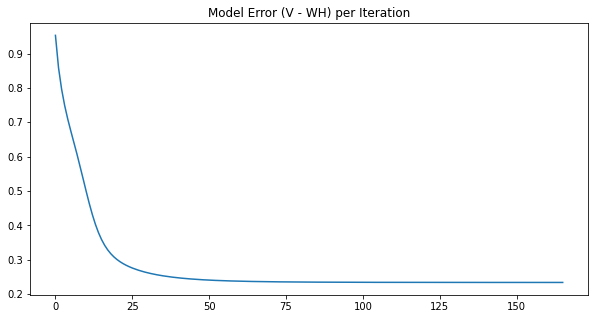

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

plt.title("Model Error (V - WH) per Iteration")
plt.plot(lim_data)
plt.show()

References: <br>
-https://www.youtube.com/watch?v=kfEWZA-b-YQ <br>
-"Algorithms for Non-negative Matrix Factorization": Lee & Seung 2001